# **Build a classifier to predict whether a person is suffering from covid, cold, flu or allergy?**

**import the required packages and libraries**


1.   Pandas is a Python library. Pandas is used to analyze data.
2.   sklearn is a machine learning library for Python. It has classes and functions with respect to various algorithms like support vector machine, logistic regression, random forests, etc.

  a. Label Encoder is for converting the values in the given column into numeric form 

  b.  StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

  c. sklearn.metrics module implements functions assessing prediction error for specific purposes.

  d.  train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data
  
5.   Keras is a Python library for neural networks

6. joblib provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently. 





In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics
import keras
import joblib
import matplotlib.pyplot as plt


**Data Preprocessing**
1. read the dataset file
2. do a little preprocessing to convert alphanumerical values in certain columns to numerical/ordinal values
3. split the dataset into test and training datasets
4. perform feature scaling

In [2]:
def readDataMulti():
#add the csv file to the current directory before proceeding
# read the CSV file
  global scaler
  global dictionary
  global colnames
   #path to the file in the current directory
  features = pd.read_csv('/kaggle/input/covid-flu-cold-symptoms/large_data.csv')                            #reading the file
  features = features.rename(columns={'TYPE' : 'class'})  #renaming the result column
  colnames=features.columns
  # Label Encoding refers to converting the labels into numeric form so as to convert it 
  # into the machine-readable form. 
  # Machine learning algorithms can then decide in a better way on how those labels must be operated
  label_encoder = LabelEncoder()                               
  features['class']= label_encoder.fit_transform(features['class']) #performing label encoding in the given column
  labels = features.pop('class')  #removing the class column from the features table
  keys = label_encoder.classes_  
  values = label_encoder.transform(label_encoder.classes_)
  dictionary = dict(zip(keys, values)) #storing the converted column entries as (key,value) pairs
  print(dictionary)
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20,random_state=5)  #splitting the dataset into train and test set
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train) 
  X_test = scaler.transform(X_test)
  return X_train,y_train, X_test, y_test

# Building a neural network classifier

Machine learning algorithms that use neural networks generally do not need to be programmed with specific rules that define what to expect from the input. The neural net learning algorithm instead learns from processing many labeled examples that are supplied during training and using this answer key to learn what characteristics of the input are needed to construct the correct output. Once a sufficient number of examples have been processed, the neural network can begin to process new, unseen inputs and successfully return accurate results.   

Here we build a neural network classifier with 2 layers having 32 neurons each.
1. Use tanh activation function for hidden layers
2. Use softmax activation function for output layer

In [3]:
# Train and evaluate
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    global accuracyNN
    m=X_train.shape[0]
    n=X_train.shape[1]
    classes=4
    # Create layers
    inputs = keras.layers.Input(shape=(n,), dtype='float32', name='input_layer') # Input (2 dimensions)
    outputs = keras.layers.Dense(32, activation='tanh', name='hidden_layer1')(inputs) # Hidden layer
    outputs = keras.layers.Dense(32, activation='tanh', name='hidden_layer2')(outputs) # Hidden layer
    outputs = keras.layers.Dense(classes, activation='softmax', name='output_layer')(outputs) # Output layer 
    # Create a model from input layer and output layers
    model = keras.models.Model(inputs=inputs, outputs=outputs, name='neural_network')
    # Convert labels to categorical: categorical_crossentropy expects targets to be binary matrices (1s and 0s) of shape (samples, classes)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    Y_binary = keras.utils.to_categorical(Y_train, num_classes=classes, dtype='int')
    # Train the model on the train set (output debug information)
    model.fit(X_train, Y_binary, epochs=100, verbose=1)
    # Save the model (Make sure that the folder exists)
    model.save('nn.h5')
    # Evaluate on training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    #now make the prob. of the class which has the highest prob. as 1 and the prob. of other classes as 0
    for i in range(m):
      max=predictions[i].max()
      predictions[i][predictions[i] != max]=0
      predictions[i][predictions[i] == max]=1
    accuracy = sklearn.metrics.accuracy_score(Y_binary, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_binary, predictions))
    print('')
    # Evaluate on test data
    print('\n---- Test data ----')
    predictions = model.predict(X_test)
    Y_test=np.asarray(Y_test).astype('int32')
    Y_binary_test = keras.utils.to_categorical(Y_test, num_classes=classes, dtype='int')
    m1=Y_test.shape[0]
    for i in range(m1):
      max=predictions[i].max()
      predictions[i][predictions[i] != max]=0
      predictions[i][predictions[i] == max]=1
    accuracyNN = sklearn.metrics.accuracy_score(Y_binary_test, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_binary_test,predictions))

# The main entry point for this module
def main():
    # Load data set (includes header values)
    X_train_label,Y_train_label,X_test,Y_test=readDataMulti()
    # Train and evaluate
    train_and_evaluate(X_train_label, Y_train_label, X_test, Y_test)
# Tell python to run main method
if __name__ == "__main__": 
  main()

{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
Epoch 1/100
1112/1112 [==============================] - 2s 1ms/step - loss: 0.3349 - accuracy: 0.8768
Epoch 2/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.9328
Epoch 3/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.9302
Epoch 4/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1060 - accuracy: 0.9307
Epoch 5/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1057 - accuracy: 0.9333
Epoch 6/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1037 - accuracy: 0.9352
Epoch 7/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1059 - accuracy: 0.9304
Epoch 8/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9324
Epoch 9/100
1112/1112 [==============================] - 1s 1ms/step - loss: 0.1028 - accuracy: 0.9331
Epoch 10/100
1112/1112 [=

# Building a Random Forest classifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [4]:
def train_and_evaluate_RF(X_train, y_train, X_test, y_test):
  global accuracyRF
  RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42) # 10 decision trees used in this classifier
  RFclassifier.fit(X_train, y_train)  #training  
  filename = 'rf_model.sav'
  joblib.dump(RFclassifier, filename)  #save the model
  y_pred = RFclassifier.predict(X_test) #predict on test set
  accuracyRF = sklearn.metrics.accuracy_score(y_test, y_pred)
  print(sklearn.metrics.confusion_matrix(y_test,y_pred))
  print(sklearn.metrics.classification_report(y_test,y_pred))

def main():
    X_train,Y_train,X_test,Y_test=readDataMulti()
    train_and_evaluate_RF(X_train, Y_train, X_test, Y_test)
# Tell python to run main method
if __name__ == "__main__": 
  main()


{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3241   81    2   14]
 [  82   73    6   50]
 [   3    5   42  360]
 [  22   67  343 4500]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3338
           1       0.32      0.35      0.33       211
           2       0.11      0.10      0.10       410
           3       0.91      0.91      0.91      4932

    accuracy                           0.88      8891
   macro avg       0.58      0.58      0.58      8891
weighted avg       0.88      0.88      0.88      8891



# Building an SVM classifier

Support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.  An SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [5]:
from sklearn.svm import SVC
def train_and_evaluate_SVM(X_train, y_train, X_test, y_test):
  global accuracySVM
  svclassifier = SVC(kernel='rbf')
  svclassifier.fit(X_train, y_train)
  filename = 'svm_model.sav'
  joblib.dump(svclassifier, filename) #save the model
  y_pred = svclassifier.predict(X_test)  #predict on test set
  accuracySVM = sklearn.metrics.accuracy_score(y_test, y_pred)
  print(sklearn.metrics.confusion_matrix(y_test,y_pred))
  print(sklearn.metrics.classification_report(y_test,y_pred))

def main():
    X_train,Y_train,X_test,Y_test=readDataMulti()
    train_and_evaluate_SVM(X_train, Y_train, X_test, Y_test)
# Tell python to run main method
if __name__ == "__main__": 
  main()

{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3317   18    3    0]
 [ 104   99    8    0]
 [   5    0  195  210]
 [  40   51  280 4561]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3338
           1       0.59      0.47      0.52       211
           2       0.40      0.48      0.44       410
           3       0.96      0.92      0.94      4932

    accuracy                           0.92      8891
   macro avg       0.73      0.72      0.72      8891
weighted avg       0.92      0.92      0.92      8891



# **Testing on a single independent test instance**

In [6]:
# It can be used to reconstruct the model identically.
n=colnames.shape[0]-1
test_input=[]
for i in range(n):
    print("Do you have ", colnames[i], "?? Enter 1 for Yes and 0 for No-")
    inp=input()
    test_input.append(inp)
test_input=np.asarray(test_input)
test_input = test_input.reshape(1, -1)  #reshaping because right now shape of array is (n,) which has to be converted to (1,n)
test_input = scaler.transform(test_input)
key_list = list(dictionary.keys()) #make a list of keys 
val_list = list(dictionary.values()) #make a list of values 

# load the Neural Network model from disk
nn_model = keras.models.load_model("nn.h5")

prediction1=nn_model(test_input) 
prediction1=np.asarray(prediction1)
max_index_col = np.argmax(prediction1, axis=1) #find the max value in the output vector
print("NN says you have", key_list[val_list.index(max_index_col)]) #printing the key value wrt the output given by NN

# load the Log. Reg. model from disk
rf_model = joblib.load('rf_model.sav')
prediction2=rf_model.predict(test_input)
print("RF says you have", key_list[val_list.index(prediction2)]) #printing the key value wrt the output given by NN
# load the SVM model from disk
svm_model = joblib.load('svm_model.sav')
prediction3=svm_model.predict(test_input)
print("SVM says you have", key_list[val_list.index(prediction3)]) #printing the key value wrt the output given by NN

Do you have  COUGH ?? Enter 1 for Yes and 0 for No-


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

# **Plotting the performance of all the 3 classifiers on our dataset**

Text(0, 0.5, 'accuracy')

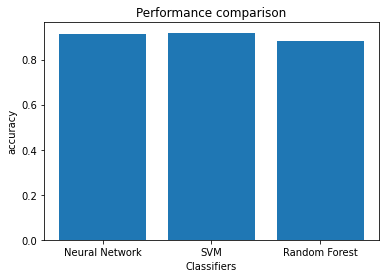

In [7]:
y = np.array([accuracyNN,accuracySVM,accuracyRF]) 
x = ['Neural Network','SVM','Random Forest']
plt.bar(x,y)
plt.title('Performance comparison')
plt.xlabel('Classifiers')
plt.ylabel('accuracy')